In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("M:\Downloads\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.drop("CustomerID",axis=1,inplace=True)

In [7]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [8]:
print("Missing values:")
df.isnull().sum()

Missing values:


Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
df.info

<bound method DataFrame.info of       Genre  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]>

In [12]:
df.nunique()

Genre                      2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

In [13]:
df.corr()

ValueError: could not convert string to float: 'Male'

In [14]:
df = pd.get_dummies(df, columns=['Genre'])
print(df.head())

   Age  Annual Income (k$)  Spending Score (1-100)  Genre_Female  Genre_Male
0   19                  15                      39         False        True
1   21                  15                      81         False        True
2   20                  16                       6          True       False
3   23                  16                      77          True       False
4   31                  17                      40          True       False


In [16]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
Age,1.000000,-0.012398,-0.327227,-0.060867,0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,-0.056410,0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,0.058109,-0.058109
Genre_Female,-0.060867,-0.056410,0.058109,1.000000,-1.000000
Genre_Male,0.060867,0.056410,-0.058109,-1.000000,1.000000


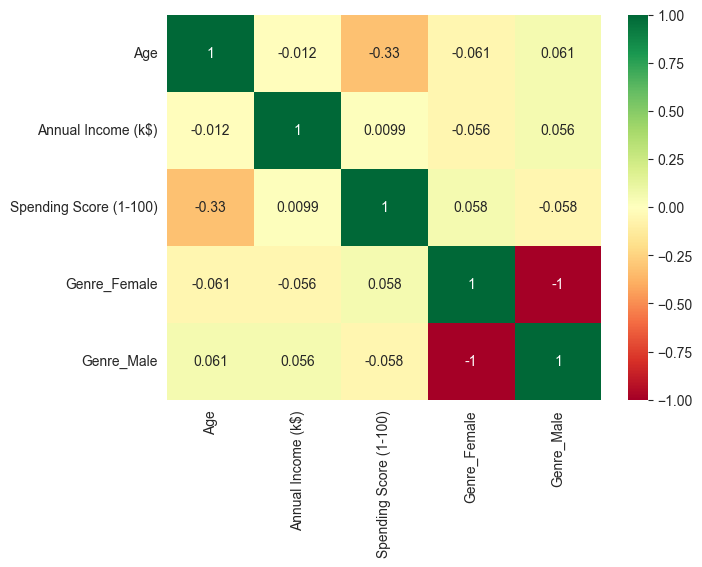

In [17]:
plt.figure(figsize=(7,5)) 
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn') 
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

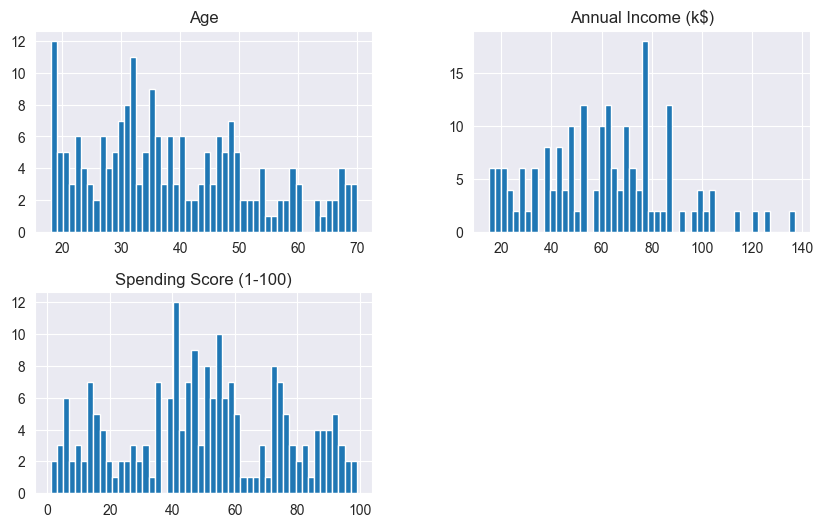

In [19]:
df.hist(bins = 50,figsize = (10,6))

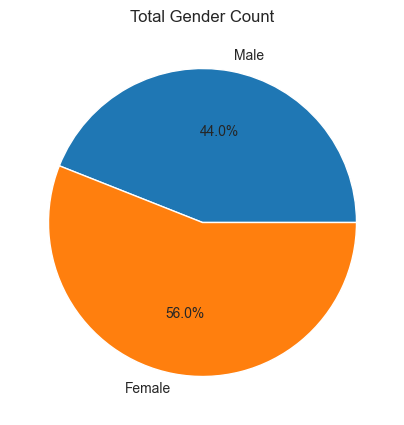

In [20]:
df[['Genre_Male', 'Genre_Female']].sum().plot(kind='pie', labels=['Male', 'Female'], autopct='%1.1f%%', figsize=(5,5))
plt.title("Total Gender Count")
plt.show()

In [22]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Female',
       'Genre_Male'],
      dtype='object')

In [28]:
df['Genre'] = df.apply(lambda row: 'Female' if row['Genre_Female'] == 1 else 'Male', axis=1)

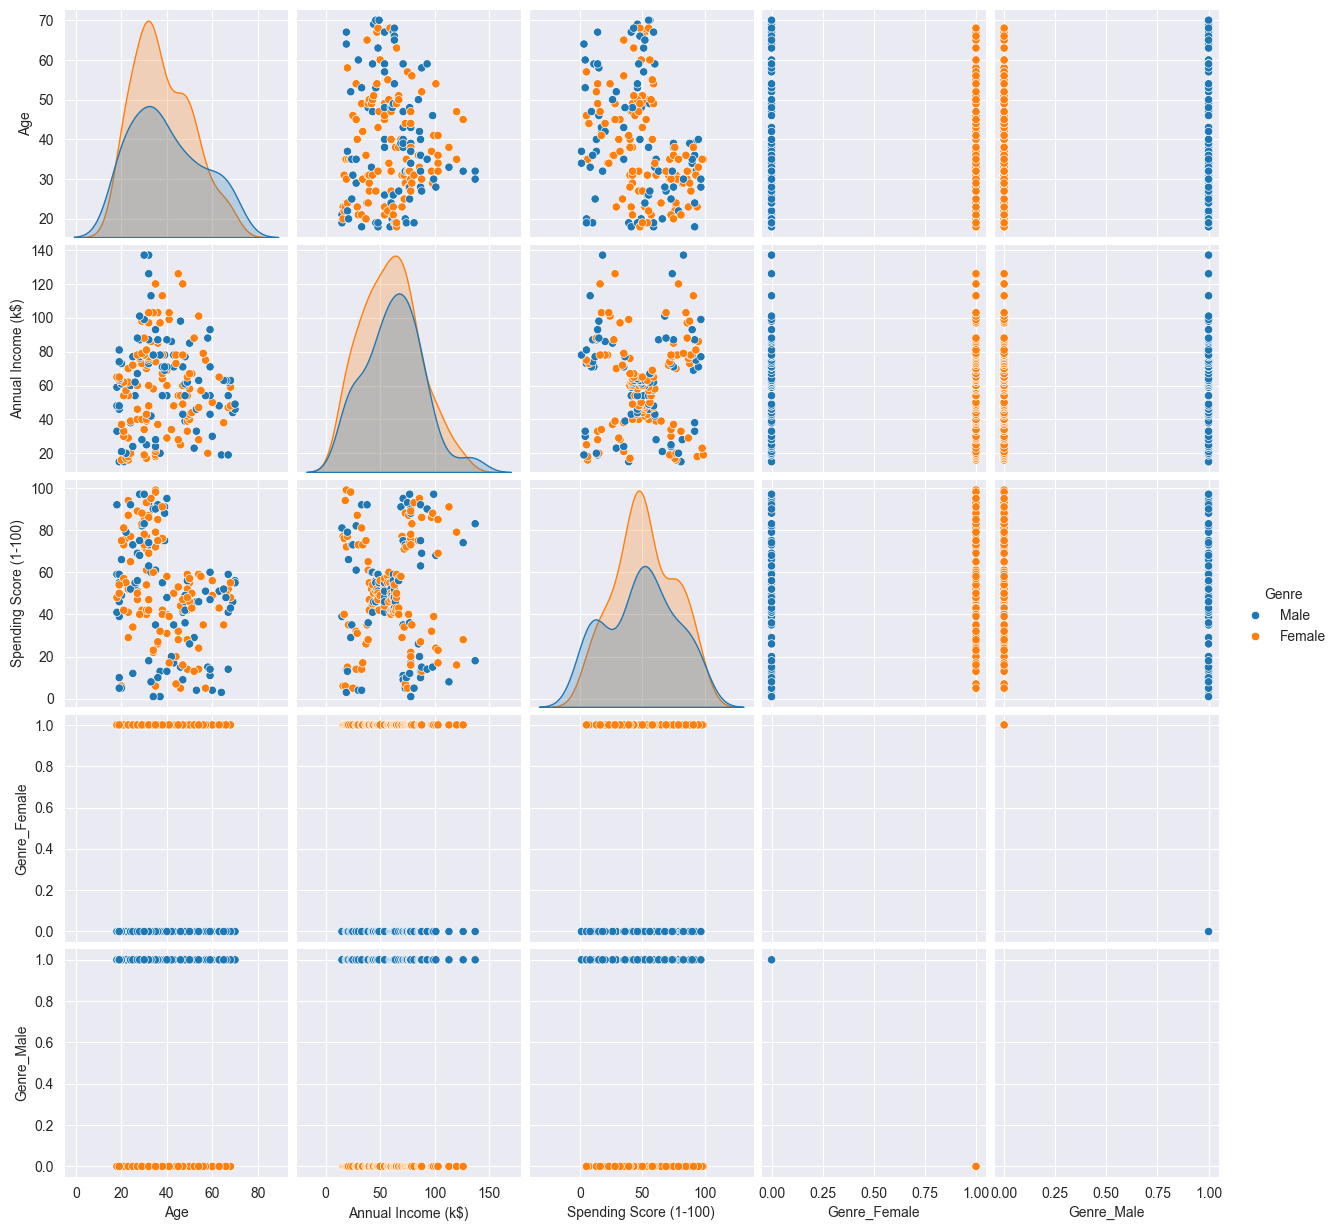

In [29]:
sns.pairplot(df, hue="Genre")
plt.show()

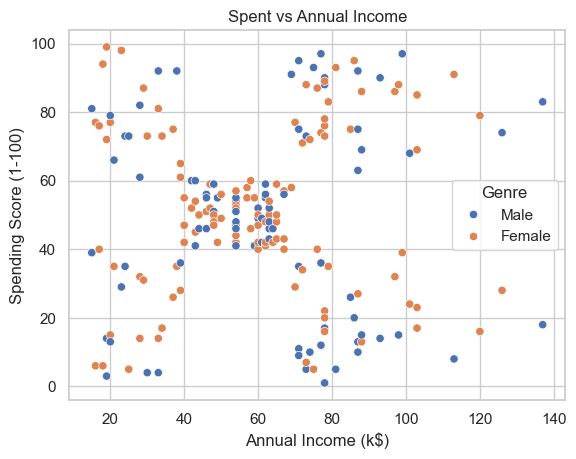

In [48]:
sns.set(style = 'whitegrid') 
sns.scatterplot(y = 'Spending Score (1-100)',x ='Annual Income (k$)',data = df,hue= "Genre"); 
plt.title('Spent vs Annual Income') 
plt.show()

In [31]:
#K means clustering algorithm

data = df.copy() 
x = data.iloc[:,[2,3]]

In [32]:
from sklearn.cluster import KMeans 
wcss = [] 
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) 
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  
    print('k:',i ,"-> wcss:",kmeans.inertia_)

k: 1 -> wcss: 132753.28000000003
k: 2 -> wcss: 45905.01305800182
k: 3 -> wcss: 13978.407788699462
k: 4 -> wcss: 8915.835768282494
k: 5 -> wcss: 5192.791390382318
k: 6 -> wcss: 3508.053055597277
k: 7 -> wcss: 3010.624100440763
k: 8 -> wcss: 2043.8120801112036
k: 9 -> wcss: 1614.6065672250456
k: 10 -> wcss: 1430.3432880826902


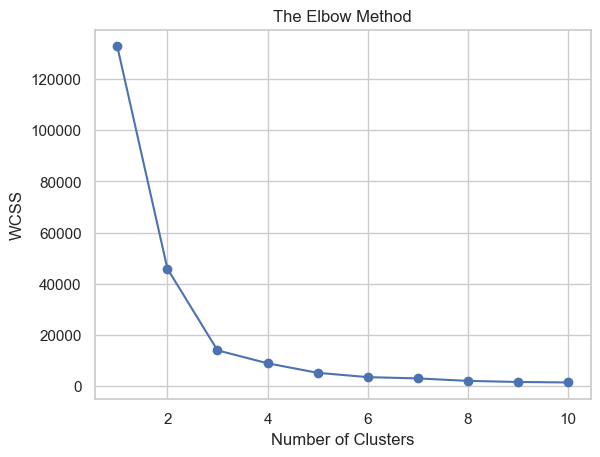

In [33]:
plt.plot(range(1,11),wcss,marker='o') 
plt.title('The Elbow Method') 
plt.xlabel('Number of Clusters') 
plt.ylabel('WCSS') 
plt.show() 

In [34]:
km1=KMeans(n_clusters=5)
km1.fit(data)
y=km1.predict(data)
data["label"] = y
data.head()

ValueError: could not convert string to float: 'Male'

In [35]:
if 'Genre' in data.columns:
    data = data.drop(columns=['Genre'])

km1=KMeans(n_clusters=5)
km1.fit(data)
y=km1.predict(data)
data["label"] = y
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,label
0,19,15,39,False,True,4
1,21,15,81,False,True,4
2,20,16,6,True,False,0
3,23,16,77,True,False,4
4,31,17,40,True,False,0


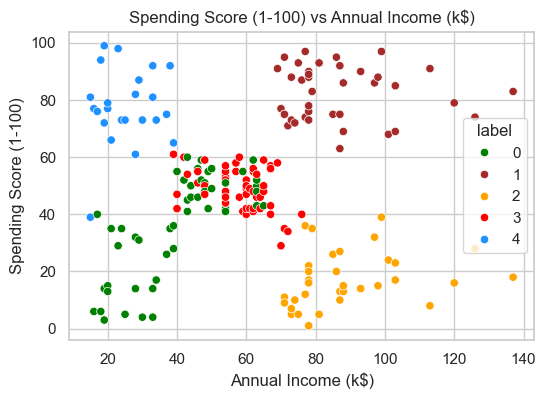

In [36]:
plt.figure(figsize=(6,4)) 
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",   
                 palette=['green','brown','orange','red','dodgerblue'],data = data ) 
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)')  
plt.title('Spending Score (1-100) vs Annual Income (k$)') 
plt.show()

In [37]:
X=data.iloc[:,:4] 
y=data.iloc[:,-1]

In [38]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

print(X_train.shape,y_train.shape) 
print(X_test.shape,y_test.shape)

(160, 4) (160,)
(40, 4) (40,)


In [39]:
from sklearn.cluster import KMeans 
km=KMeans(n_clusters=5) 
km.fit(X_train) 

y_train_km = km.predict(X_train) 
y_test_km = km.predict(X_test)

In [40]:
from sklearn.metrics.cluster import adjusted_rand_score 
 
acc_train_gmm = adjusted_rand_score(y_train,y_train_km) 
acc_test_gmm = adjusted_rand_score(y_test,y_test_km) 
 
print("K mean : Accuracy on training Data: {:.3f}".format(acc_train_gmm)) 
print("K mean : Accuracy on test Data: {:.3f}".format(acc_test_gmm))

K mean : Accuracy on training Data: 0.584
K mean : Accuracy on test Data: 0.500


In [41]:
data = df.copy() 
data = data.iloc[:,[2,3]] 
data

,Spending Score (1-100),Genre_Female
0,39,False
1,81,False
2,6,True
3,77,True
4,40,True
...,...,...
195,79,True
196,28,True
197,74,False
198,18,False


In [42]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Female',
       'Genre_Male', 'Genre'],
      dtype='object')

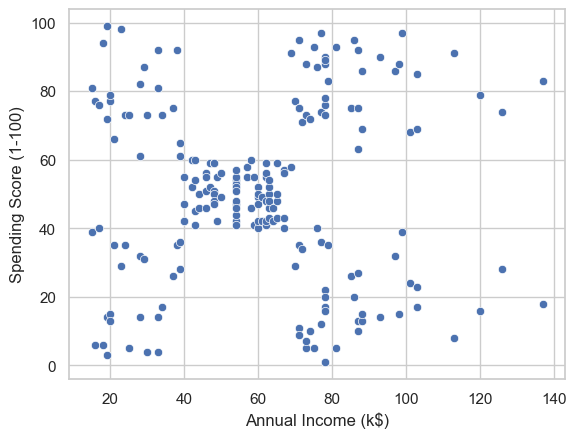

In [43]:
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data = df );

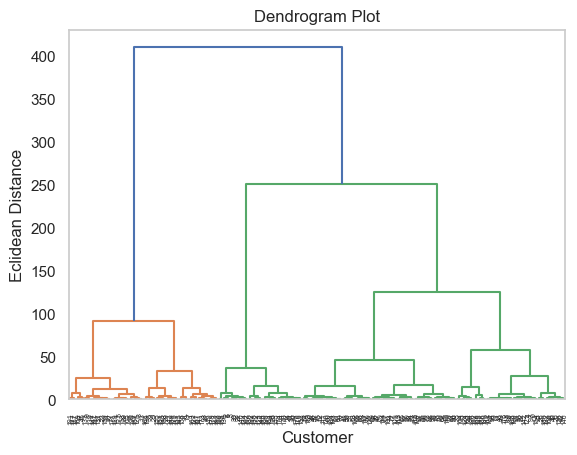

In [49]:
import scipy.cluster.hierarchy as shc 
dendrogram = shc.dendrogram(shc.linkage(data,method="ward")) 
plt.title("Dendrogram Plot") 
plt.xlabel("Customer") 
plt.ylabel("Eclidean Distance") 
plt.grid(False) 

In [45]:
from sklearn.cluster import AgglomerativeClustering 
agc = AgglomerativeClustering(n_clusters=5) 
data["label"] = agc.fit_predict(data) 
data

,Spending Score (1-100),Genre_Female,label
0,39,False,0
1,81,False,3
2,6,True,2
3,77,True,4
4,40,True,0
...,...,...,...
195,79,True,4
196,28,True,0
197,74,False,4
198,18,False,2


In [46]:
df. columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Female',
       'Genre_Male', 'Genre'],
      dtype='object')

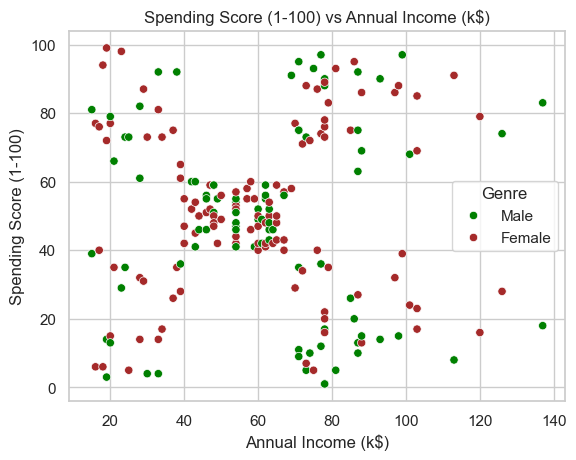

In [50]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre',
                palette=['green', 'brown', 'orange', 'red', 'dodgerblue'], data=df)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()


In [52]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Female',
       'Genre_Male', 'Genre'],
      dtype='object')

In [56]:
from sklearn.cluster import AgglomerativeClustering 
import seaborn as sns
import matplotlib.pyplot as plt

print(data.columns)

agc = AgglomerativeClustering(n_clusters=5) 

data["label"] = agc.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']]) 

Index(['Spending Score (1-100)', 'Genre_Female', 'label'], dtype='object')


KeyError: "['Annual Income (k$)'] not in index"